In [107]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import  ImageDataGenerator,load_img,img_to_array  #数据增强
import matplotlib.pyplot as plt 
import os
import numpy as np

In [108]:
inpt_shape=250
batch_size=10

In [109]:
#定义数据增增强器
train_datagen=ImageDataGenerator(
                            rescale=1/255,    #数据归一化
                            )   
path=r"/home/bdai/718/tensroflow2022/2_CNN/case/case3_natural_images/data/train"
train_data=train_datagen.flow_from_directory(directory=path,
                                            batch_size=batch_size,      #批次
                                            target_size=(inpt_shape,inpt_shape),  #图片的纬度
                                            class_mode="sparse"  #多分类
                                            )
print(train_data.image_shape)
train_label=train_data.classes #训练集标签
print(len(train_label))
#train_images,tarin_labels= next(train_data)  #转化后的数据

#测试数据
path1=r"/home/bdai/718/tensroflow2022/2_CNN/case/case3_natural_images/data/test"
test_datagen=ImageDataGenerator(rescale=1/255)  
test_data=test_datagen.flow_from_directory(directory=path1,
                                            batch_size=batch_size,      #批次
                                            target_size=(inpt_shape,inpt_shape),  #图片的纬度
                                            class_mode="sparse"
                                            )   
test_images,test_laebls= next(test_data)  #数据是矩阵，还有列表形式的标签
#print(test_laebls)                                            
#test_label=test_data.classes #测试集标签
#print(test_label)
##test_images, _ = next(test_data)  #转化后的数据

##查看分类
train_class=train_data.class_indices
print(train_class)
##查看图片属性
#print(train_data.image_shape)

Found 2826 images belonging to 5 classes.
(250, 250, 3)
2826
Found 1500 images belonging to 5 classes.
{'airplane': 0, 'car': 1, 'flower': 2, 'fruit': 3, 'motorbike': 4}


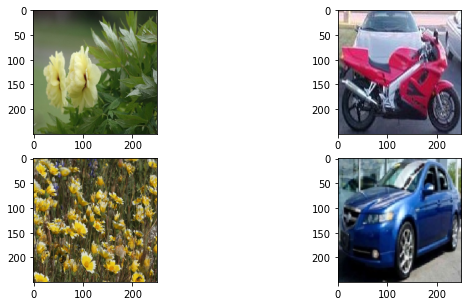

In [110]:
train_images,train_labels=next(train_data)
plt.figure(figsize=(10,5))
#显示图像
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(train_images[i])

In [118]:
model=tf.keras.Sequential([
    #卷积层s
    tf.keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            activation="relu",
                            padding="same",
                            input_shape=(inpt_shape,inpt_shape,3) #3代表的是RGB图像
                            ),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),

    #全连接层
    tf.keras.layers.Flatten(),  #数据扁平化
    #hidden layer
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=200,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    #output layer
    tf.keras.layers.Dense(units=5,  
                        activation=tf.nn.softmax)  #二分类问题
])
model.compile(optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=["accuracy"]
                )
#model.summary()  #查看模型参数
 #模型训练
hist=model.fit_generator(train_data,epochs=10,validation_data=test_data)
#模型验证
print(model.evaluate_generator(test_data))


Epoch 1/10


/tmp/ipykernel_625053/303646576.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_data,epochs=10,validation_data=test_data)


283/283 [==============================] - 24s 51ms/step - loss: 1.4186 - accuracy: 0.8086 - val_loss: 2.1327 - val_accuracy: 0.7667
Epoch 2/10
283/283 [==============================] - 14s 51ms/step - loss: 0.1293 - accuracy: 0.9540 - val_loss: 3.3044 - val_accuracy: 0.7507
Epoch 3/10
283/283 [==============================] - 17s 59ms/step - loss: 0.0981 - accuracy: 0.9699 - val_loss: 2.4638 - val_accuracy: 0.7713
Epoch 4/10
283/283 [==============================] - 14s 51ms/step - loss: 0.0788 - accuracy: 0.9759 - val_loss: 4.0196 - val_accuracy: 0.7553
Epoch 5/10
283/283 [==============================] - 14s 51ms/step - loss: 0.0635 - accuracy: 0.9812 - val_loss: 4.0282 - val_accuracy: 0.7720
Epoch 6/10
283/283 [==============================] - 14s 50ms/step - loss: 0.0495 - accuracy: 0.9858 - val_loss: 3.5694 - val_accuracy: 0.7673
Epoch 7/10
283/283 [==============================] - 17s 60ms/step - loss: 0.0279 - accuracy: 0.9922 - val_loss: 3.8746 - val_accuracy: 0.7593
Epo

/tmp/ipykernel_625053/303646576.py:30: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print(model.evaluate_generator(test_data))


[4.451340198516846, 0.762666642665863]


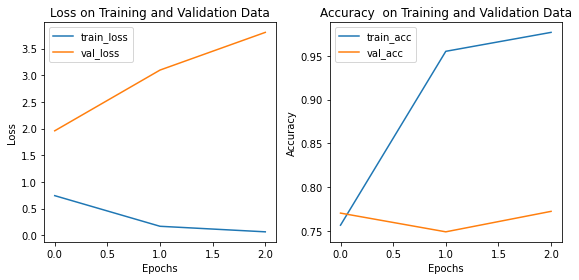

In [116]:
# define the function
def training_vis(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['accuracy']  # new version => hist.history['accuracy'] 
    val_acc = hist.history['val_accuracy'] #=> hist.history['val_accuracy'] 
    
    # make a figure
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

training_vis(hist)

(250, 250, 3)
[1.4158119e-04 9.9982005e-01 2.6813928e-05 1.9966487e-08 1.1512449e-05]
1
1


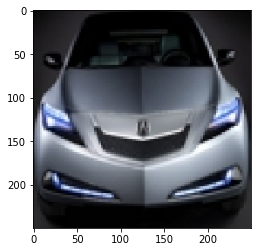

In [114]:
print(test_images[1].shape)
prediction=model.predict(test_images)[1]
print(prediction)
print(np.argmax(prediction))  #取最大值的索引
print(int(test_laebls[1]))
plt.imshow(test_images[1])
